In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_hdf('data-p1/agg_polls_by_day.h5')
df

,pollster,state,population,day,grade,weighted_clinton,weighted_trump,samplesize_total,c-minus-t
0,ABC News/Washington Post,Maryland,lv,2016-09-27,A+,63.0,27.0,706.0,36.0
1,ABC News/Washington Post,Maryland,lv,2016-09-28,A+,63.0,27.0,706.0,36.0
2,ABC News/Washington Post,Maryland,lv,2016-09-29,A+,63.0,27.0,706.0,36.0
3,ABC News/Washington Post,Maryland,lv,2016-09-30,A+,63.0,27.0,706.0,36.0
4,ABC News/Washington Post,Maryland,rv,2016-03-30,A+,63.0,28.0,752.0,35.0
...,...,...,...,...,...,...,...,...,...
20292,icitizen,U.S.,rv,2016-09-15,NaN,42.0,37.0,1000.0,5.0
20293,icitizen,U.S.,rv,2016-09-16,NaN,42.0,37.0,1000.0,5.0
20294,icitizen,U.S.,rv,2016-09-17,NaN,42.0,37.0,1000.0,5.0
20295,icitizen,U.S.,rv,2016-09-18,NaN,42.0,37.0,1000.0,5.0


In [14]:
df = df[df["state"] != 'U.S']


def weighted_average(group, value_column):
    sqrt_sample_sizes = group['samplesize_total'] ** 0.5
    median_sqrt_sample_size = group['samplesize_total'].median() ** 0.5
    weights = sqrt_sample_sizes / median_sqrt_sample_size
    return (group[value_column] * weights).sum() / weights.sum()


# no separation by state
df_agg = df.groupby(['day','population']).apply(lambda group: weighted_average(group, 'c-minus-t'))

# Reset the index to make 'day' a regular column again
df_agg = df_agg.reset_index()

df_agg = df_agg.rename(columns={df_agg.columns[-1]:'c-minus-t'})

# Display the new aggregated DataFrame
print("Aggregated DataFrame (df_agg):")
print(df_agg)

Aggregated DataFrame (df_agg):
           day population  c-minus-t
0   2015-11-06         rv   7.000000
1   2015-11-07         rv   7.000000
2   2015-11-07          v  -5.000000
3   2015-11-08         rv   7.000000
4   2015-11-08          v  -5.000000
..         ...        ...        ...
899 2016-11-05         lv   1.395975
900 2016-11-05         rv   1.754245
901 2016-11-06         lv   1.478044
902 2016-11-06         rv   1.754245
903 2016-11-07         lv   1.396024

[904 rows x 3 columns]


C:\Users\mairi\AppData\Local\Temp\ipykernel_46208\1455997602.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['day','population']).apply(lambda group: weighted_average(group, 'c-minus-t'))


In [31]:
df_agg = df_agg[df_agg['day']>=pd.to_datetime('2016-09-01')]

target = df_agg[df_agg['population'] == 'lv']
target['delta'] = target['c-minus-t'] - target.shift(1)['c-minus-t']


C:\Users\mairi\AppData\Local\Temp\ipykernel_46208\3002136068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['delta'] = target['c-minus-t'] - target.shift(1)['c-minus-t']


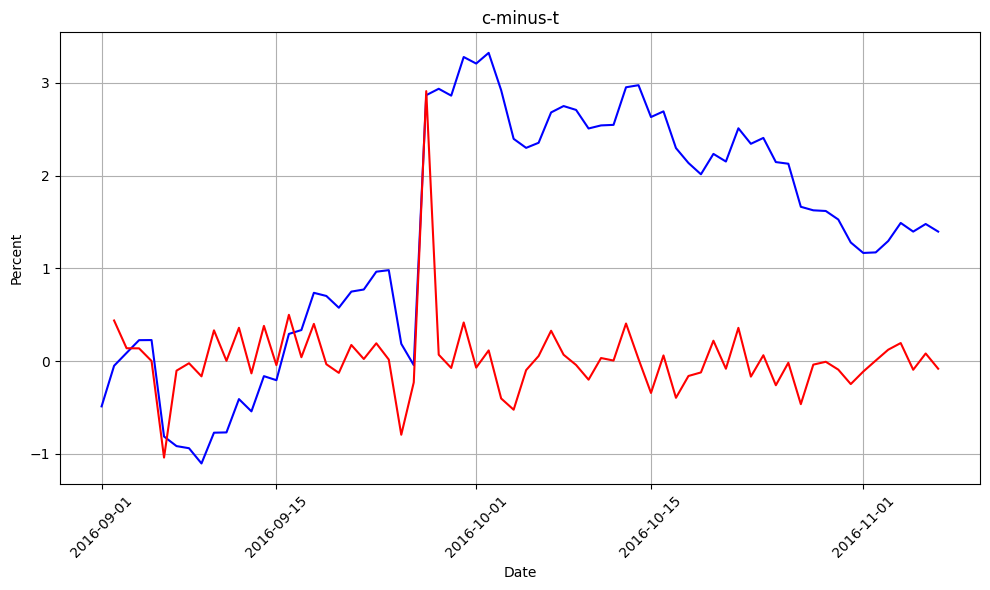

In [32]:
# Plot 'c-minus-t' by day
plt.figure(figsize=(10, 6))
# plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['c-minus-t'], marker=None, linestyle='-', color='b')
plt.plot(target['day'], target['delta'], marker=None, linestyle='-', color='r')



# Add labels and title
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('c-minus-t')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
percentile = target['c-minus-t'].quantile([0.1,0.9]) # to show more entries

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton = target[target['c-minus-t'] <= percentile[0.1]]

worst_clinton

,day,population,c-minus-t,delta
755,2016-09-06,lv,-0.813047,-1.039837
757,2016-09-07,lv,-0.916195,-0.103148
759,2016-09-08,lv,-0.939113,-0.022918
761,2016-09-09,lv,-1.103406,-0.164293
763,2016-09-10,lv,-0.771802,0.331604
765,2016-09-11,lv,-0.768740,0.003062
769,2016-09-13,lv,-0.541825,-0.132273


In [45]:
best_clinton = target[target['c-minus-t'] >= percentile[0.9]]
best_clinton

,day,population,c-minus-t,delta
802,2016-09-28,lv,2.935580,0.068880
806,2016-09-30,lv,3.278033,0.416356
808,2016-10-01,lv,3.207561,-0.070472
810,2016-10-02,lv,3.322758,0.115197
813,2016-10-03,lv,2.919941,-0.402817
842,2016-10-13,lv,2.951806,0.405197
845,2016-10-14,lv,2.974145,0.022339


In [46]:
percentile_delta = target['delta'].quantile([0.1,0.9])

# Get rows where 'column_name' exceeds the 95th percentile
worst_clinton_delta = target[target['delta'] <= percentile_delta[0.1]]

worst_clinton_delta

,day,population,c-minus-t,delta
755,2016-09-06,lv,-0.813047,-1.039837
796,2016-09-25,lv,0.186380,-0.793975
813,2016-10-03,lv,2.919941,-0.402817
816,2016-10-04,lv,2.395921,-0.524020
847,2016-10-15,lv,2.630972,-0.343173
852,2016-10-17,lv,2.296332,-0.395724
880,2016-10-27,lv,1.663507,-0.464145


In [47]:
best_clinton_delta = target[target['delta'] >= percentile_delta[0.9]]
best_clinton_delta

,day,population,c-minus-t,delta
747,2016-09-02,lv,-0.050294,0.437741
772,2016-09-14,lv,-0.162278,0.379547
778,2016-09-16,lv,0.292973,0.498831
782,2016-09-18,lv,0.736053,0.401280
800,2016-09-27,lv,2.866699,2.910209
806,2016-09-30,lv,3.278033,0.416356
842,2016-10-13,lv,2.951806,0.405197
